# Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [74]:
recent_grads=pd.read_csv("recent-grads.csv")

In [75]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [76]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [77]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [78]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [79]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [80]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


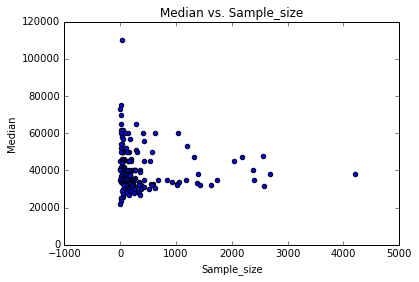

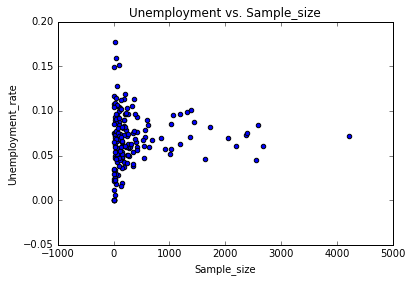

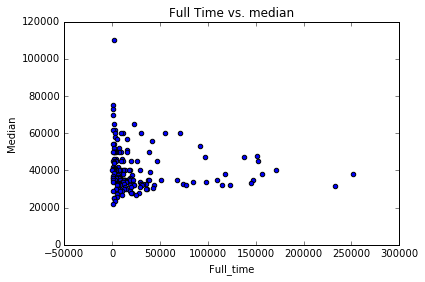

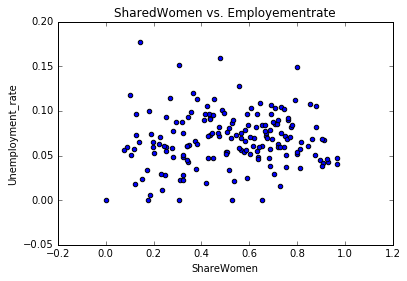

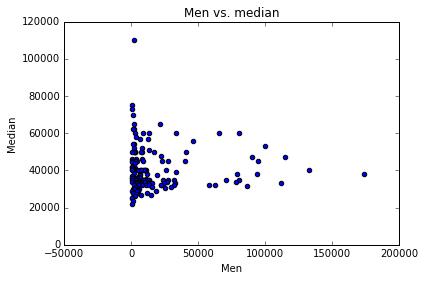

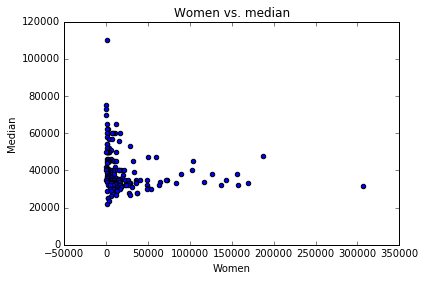

In [81]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment vs. Sample_size')
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. median')
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='SharedWomen vs. Employementrate')
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. median')
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. median')

## Exploring the Median Salaries 

In [82]:
recent_grads["Median"].sort_values()

172     22000
171     23400
169     25000
170     25000
168     26000
167     27000
166     27000
165     27500
164     28000
163     28000
162     28000
159     29000
158     29000
161     29000
160     29000
150     30000
156     30000
155     30000
154     30000
153     30000
152     30000
151     30000
157     30000
149     30500
147     31000
148     31000
146     31000
145     31500
139     32000
140     32000
        ...  
28      50000
32      50000
30      50000
31      50000
29      50000
33      50000
24      51000
22      52000
23      52000
20      53000
19      54000
18      54000
17      56000
16      57000
15      57100
14      58000
8       60000
9       60000
10      60000
12      60000
13      60000
11      60000
7       62000
6       62000
5       65000
4       65000
3       70000
2       73000
1       75000
0      110000
Name: Median, Length: 172, dtype: int64

We can notice that the median salaries are between 20000 and 80000 with 1,10,000 being the outlier. Hence let us plot a histogram with 10 bins where range of bins is from 20,000 to 1,00,000

## What's the most common median salary range?

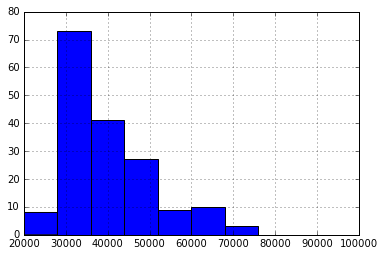

In [83]:
recent_grads['Median'].hist(bins=10,range=(20000,100000))

We can notice that most of the median salaries are around 30,000 mark

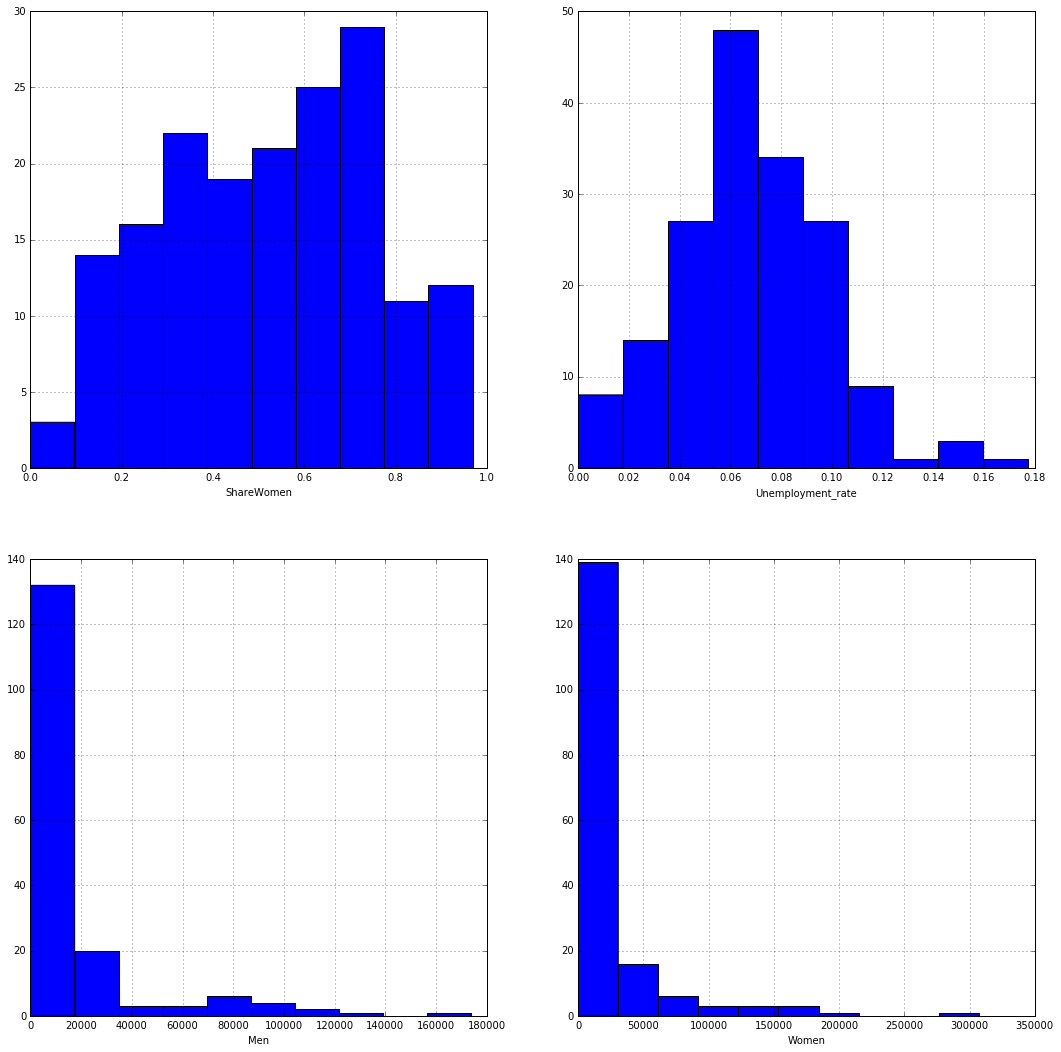

In [84]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,18))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])


Around 20 percent of majors are predominantly male.
Around 20 percent of majors are predominantly female.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5c34c7b38>,
      dtype=object)

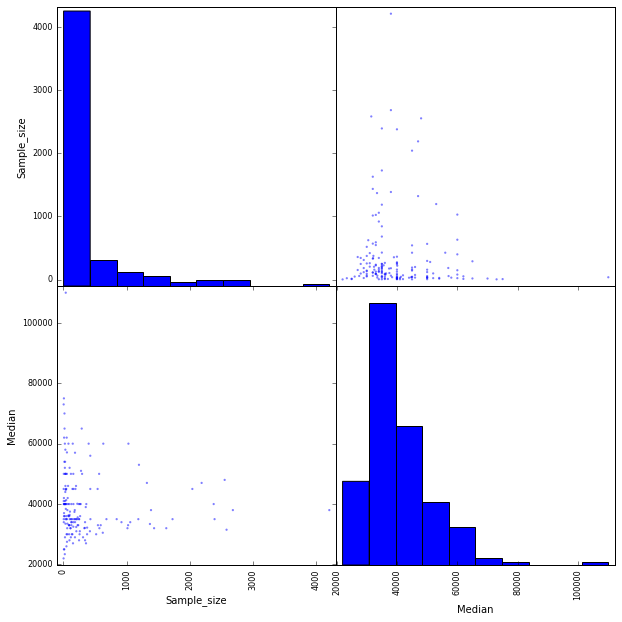

In [85]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

## Which majors are predominantly male? Predominantly female?


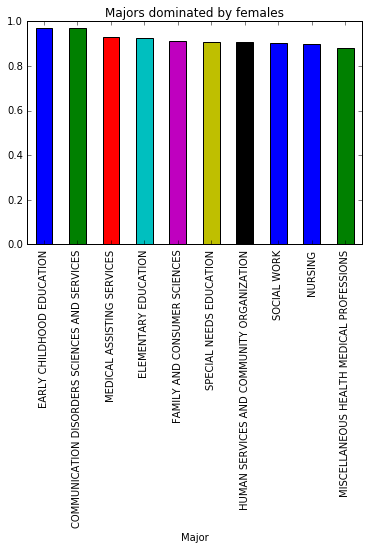

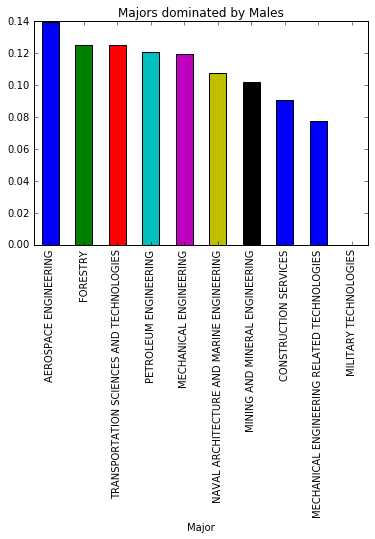

In [86]:
more_women_grads = recent_grads.sort_values(by="ShareWomen",ascending=False)
more_women_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False, title = 'Majors dominated by females')
more_women_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False, title = 'Majors dominated by Males')

## How many majors are predominantly male? Predominantly female?
(More than 60 % considered as predominant)

In [87]:
print(recent_grads.shape)
more_women_grads = more_women_grads[more_women_grads["ShareWomen"]>0.6]
print("Number of majors having predominantly females", more_women_grads.shape[0])
print("Number of majors having predominantly males", (recent_grads.shape[0]-more_women_grads.shape[0]))


(172, 21)
Number of majors having predominantly females 72
Number of majors having predominantly males 100


In [88]:
more_student_grads = recent_grads.sort_values(by="Total",ascending=False)

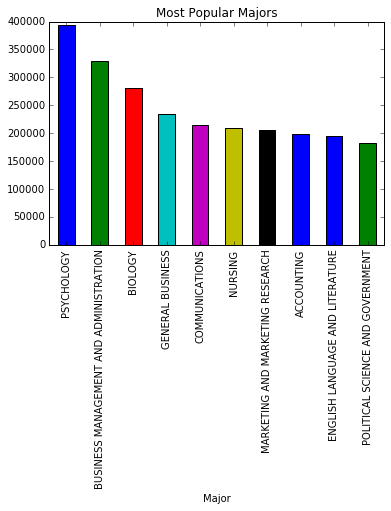

In [90]:
more_student_grads[:10].plot.bar(x='Major', y='Total', legend=False, title = 'Most Popular Majors')

## Number of males and females (Major-Category wise)

In [93]:
tm = recent_grads.pivot_table(index = 'Major_category', values = ['Men','Women'],aggfunc = np.sum)
tm

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


In [94]:
tm.shape

(16, 2)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


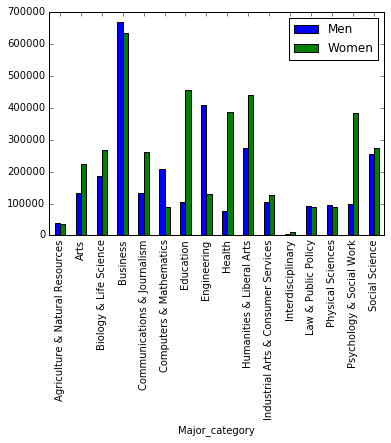

In [95]:
tm.plot.bar(x = tm.index, y= ['Men','Women'])

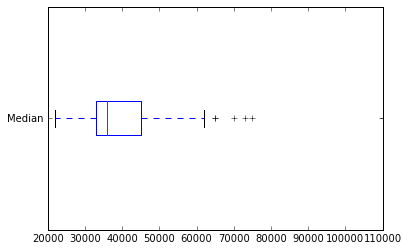

In [96]:
recent_grads['Median'].plot.box(vert=False)

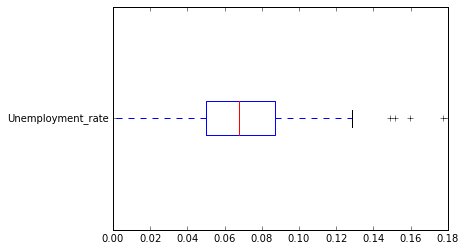

In [97]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

<b>Findings</b> 
- Majority of Recent Graduated Students are making around 35000 to 50000.<br>
- The range of Umemployment rate for Recent Graduated Students is bettween 0 to 12 percent.<br>
- The median Unemployment rate is 7 percent.<br>
- The bottom 25 percent and top 25 percent are bettween 0 to 4 percent and 8 percent to 13 percent respectively.<br>
- Majority of Unemployment are bettween 5 percent to 10 percent.<br>